import of libraries that contains classifiers and tests

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


data prerocessing with feature selection and split of data into train set and test set 

In [2]:
data=read_csv("DSLIB/data_set1.csv")
data=data[data['Code'].notna()]
data=data.dropna(axis=1)
xfeatures=data.loc[:,data.columns!="Project"]
xfeatures=xfeatures.loc[:,xfeatures.columns!="Project_name"]
xfeatures=xfeatures.loc[:,xfeatures.columns!="Submitted_by"]
xfeatures=xfeatures.loc[:,xfeatures.columns!="Sector"]
xfeatures=xfeatures.loc[:,xfeatures.columns!="Code"]
yfeatures=data["Project"]
x_train,x_test,y_train,y_test=train_test_split(xfeatures,yfeatures)


training the decision tree classifier and relative score

In [3]:
trained_model=DecisionTreeClassifier().fit(x_train,y_train)
score=trained_model.score(x_test,y_test)
score

0.8

plotting the confusion matrix of decision tree classifier

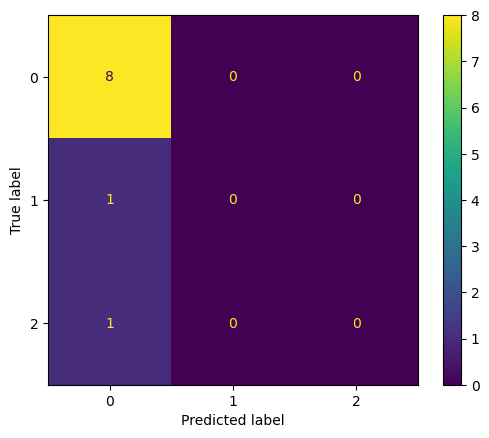

In [4]:
ytrain=trained_model.predict(x_test)
cf=confusion_matrix(y_test,ytrain)
ConfusionMatrixDisplay(confusion_matrix=cf).plot()

display of feature importances used to make the classifier explainable

In [5]:
fi=trained_model.feature_importances_
fi


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.48275862, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.51724138, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [6]:
i=0
for elem in fi: 
    if (elem >0):
        print(elem)
        print(x_train.columns[i])
    i=i+1


0.48275862068965497
TF
0.5172413793103451
SPI_STD_DEV.1


<BarContainer object of 64 artists>

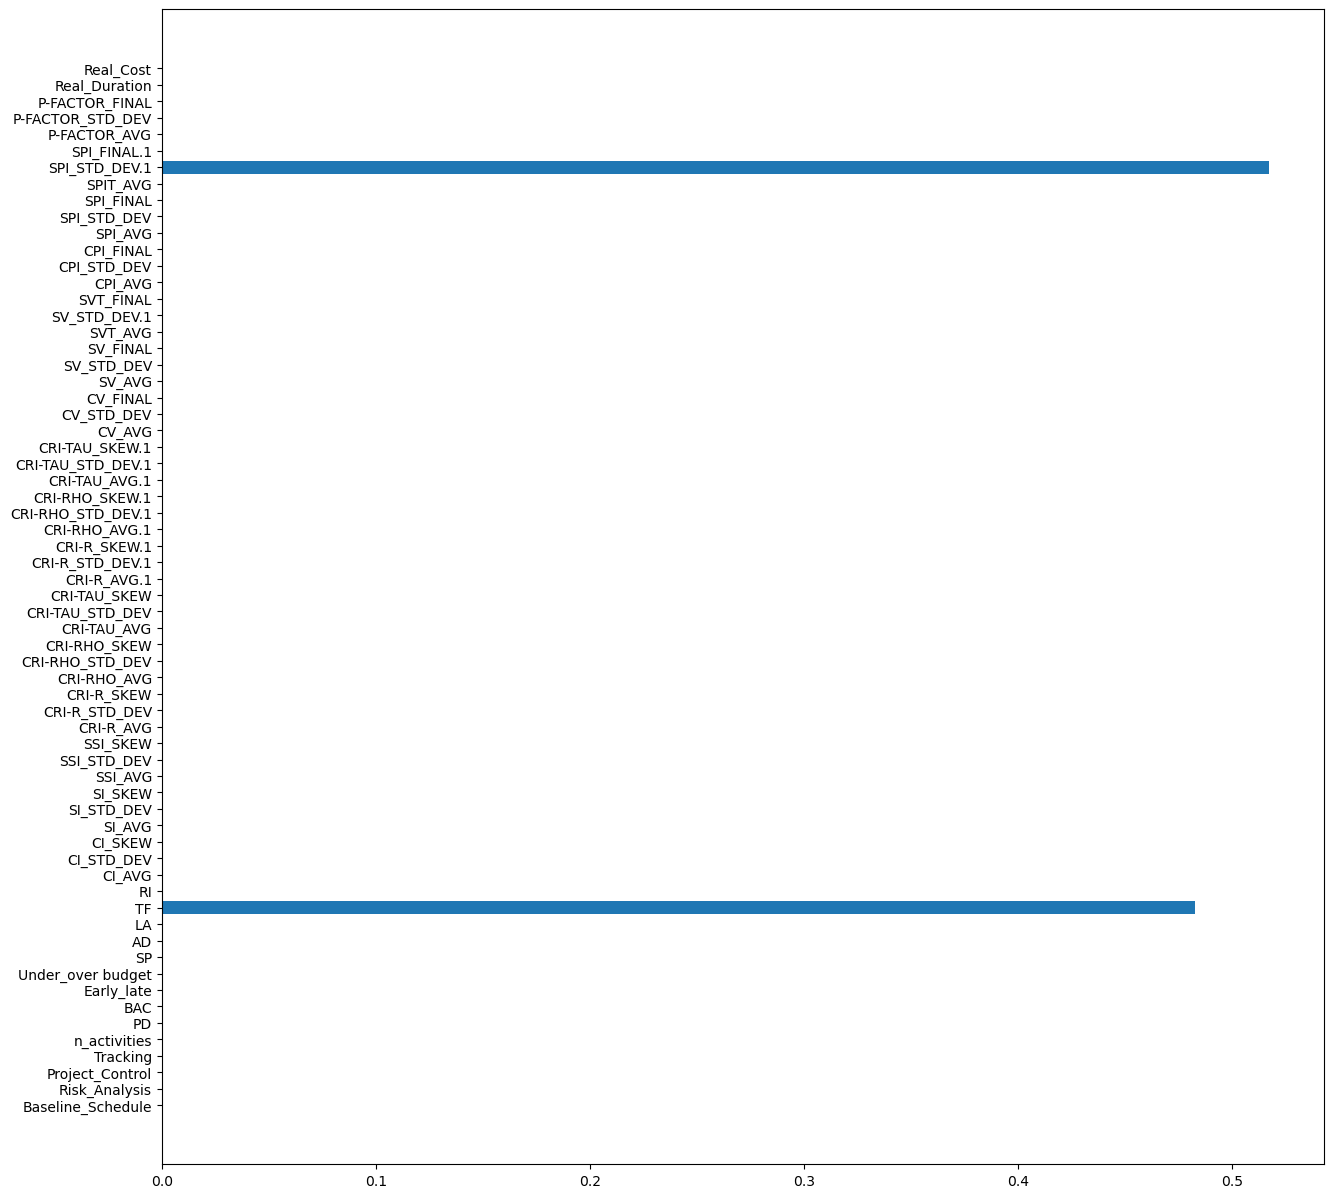

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(x_train.columns, fi)

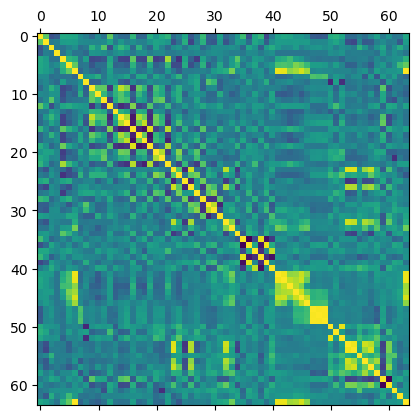

In [8]:
plt.matshow(x_train.corr())

import of random forest classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

train of the model

In [10]:
trained_model_rf=RandomForestClassifier().fit(x_train,y_train)
score_rf=trained_model_rf.score(x_test,y_test)
score_rf

0.8

plotting the confusion matrix relater the random forest classifier

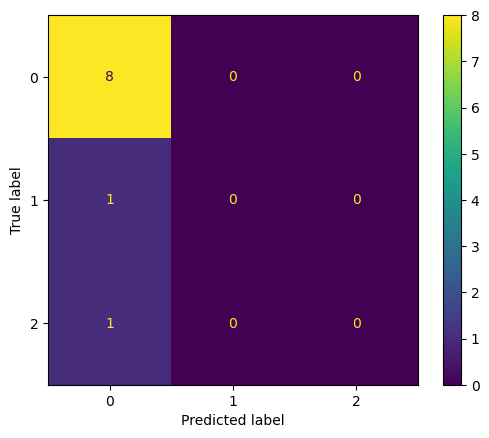

In [11]:
ytrain_rf=trained_model_rf.predict(x_test)
cf_rf=confusion_matrix(y_test,ytrain_rf)
ConfusionMatrixDisplay(confusion_matrix=cf_rf).plot()

feature importance of random forest classifier

In [12]:
fi_rf=trained_model_rf.feature_importances_
fi_rf

array([0.        , 0.        , 0.05449507, 0.        , 0.02023223,
       0.02660978, 0.00992063, 0.02434465, 0.02535382, 0.01869282,
       0.        , 0.00840077, 0.02801724, 0.02358594, 0.0192646 ,
       0.00307882, 0.00400246, 0.03061224, 0.01477833, 0.02069161,
       0.01231527, 0.01231527, 0.03962634, 0.        , 0.00956633,
       0.        , 0.        , 0.04838142, 0.00923645, 0.01231527,
       0.02614796, 0.        , 0.        , 0.00448628, 0.        ,
       0.        , 0.06218535, 0.00686813, 0.        , 0.04793482,
       0.        , 0.        , 0.01880278, 0.        , 0.00923645,
       0.00923645, 0.00923645, 0.01488095, 0.        , 0.00350765,
       0.09188316, 0.00202322, 0.05933322, 0.        , 0.        ,
       0.        , 0.0414242 , 0.03241555, 0.05308761, 0.01231527,
       0.        , 0.        , 0.01915709, 0.        ])

In [13]:
i=0
for elem in fi_rf: 
    if (elem >0):
        print(elem)
        print(x_train.columns[i])
    i=i+1


0.054495073891625605
Project_Control
0.020232230823363832
n_activities
0.026609781843771992
PD
0.009920634920634918
BAC
0.024344651653764957
Early_late
0.02535381968879506
Under_over budget
0.018692821956368757
SP
0.008400774102744533
LA
0.028017241379310342
TF
0.023585942997888815
RI
0.01926460239268121
CI_AVG
0.0030788177339901445
CI_STD_DEV
0.004002463054187186
CI_SKEW
0.030612244897959193
SI_AVG
0.014778325123152714
SI_STD_DEV
0.02069160997732426
SI_SKEW
0.012315270935960595
SSI_AVG
0.012315270935960595
SSI_STD_DEV
0.03962633904136368
SSI_SKEW
0.009566326530612243
CRI-R_STD_DEV
0.04838142153413093
CRI-RHO_STD_DEV
0.009236453201970448
CRI-RHO_SKEW
0.012315270935960595
CRI-TAU_AVG
0.02614795918367347
CRI-TAU_STD_DEV
0.004486277269528484
CRI-R_STD_DEV.1
0.06218535159421858
CRI-RHO_STD_DEV.1
0.006868131868131866
CRI-RHO_SKEW.1
0.04793482379689278
CRI-TAU_STD_DEV.1
0.01880277973258269
CV_STD_DEV
0.009236453201970448
SV_AVG
0.009236453201970448
SV_STD_DEV
0.009236453201970448
SV_FINAL
0.

<BarContainer object of 64 artists>

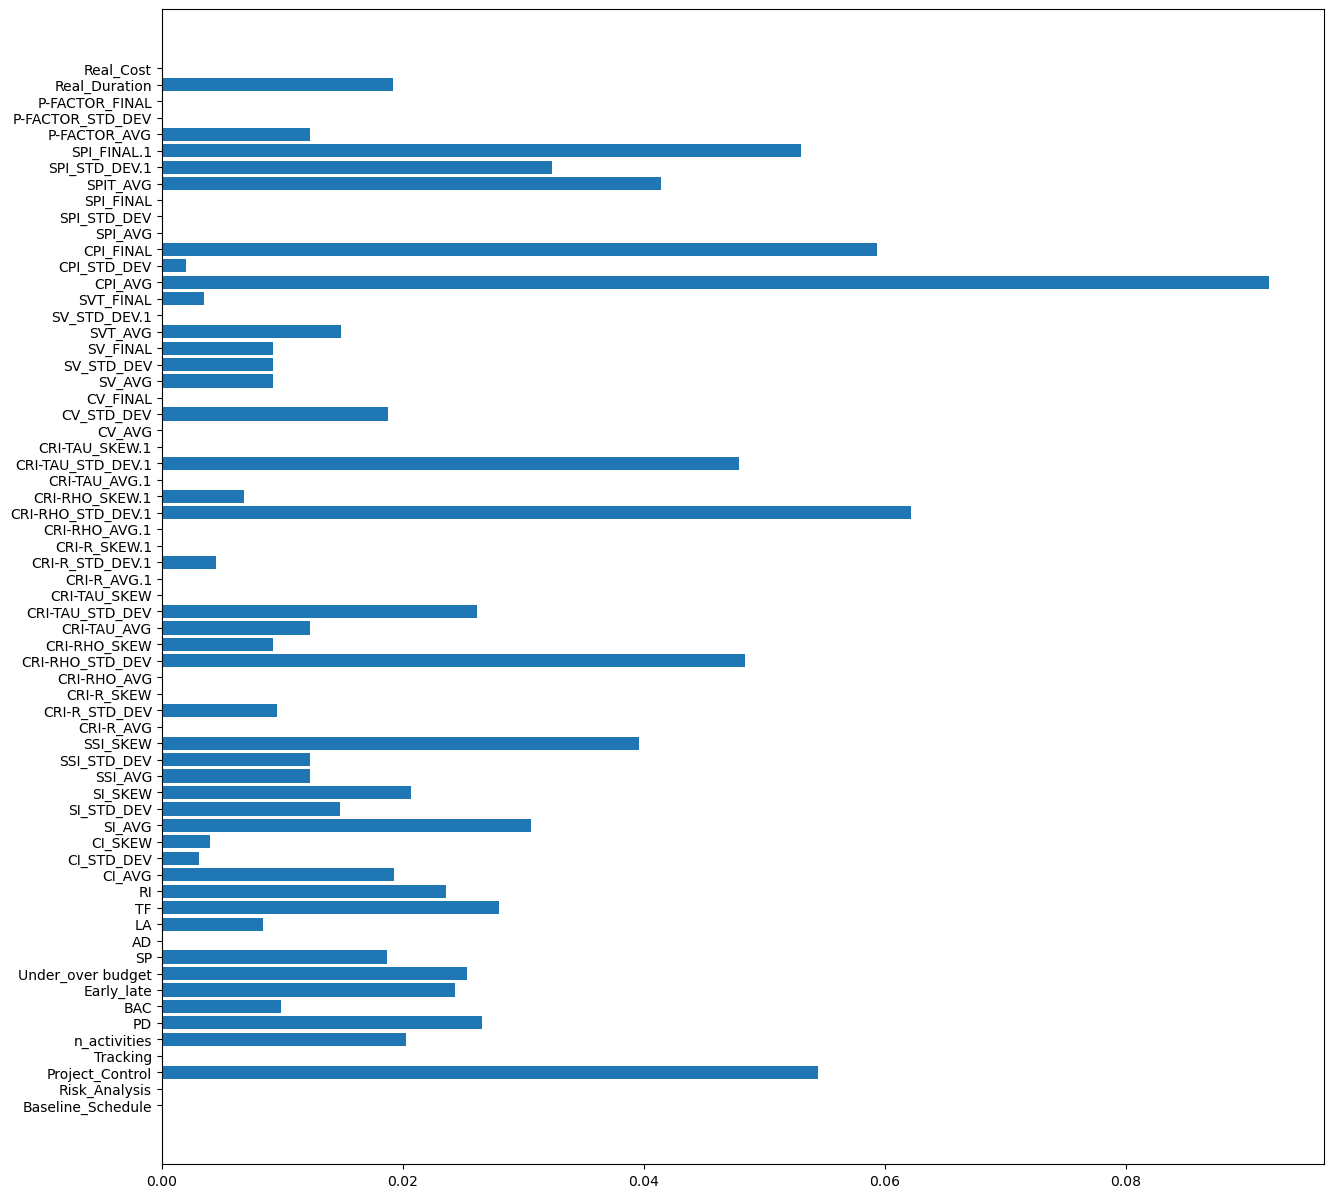

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(x_train.columns, fi_rf)

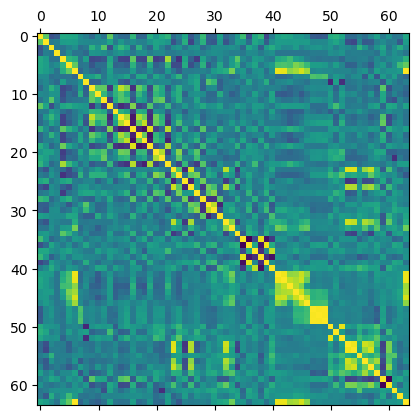

In [15]:
plt.matshow(x_train.corr())

import of ada boost classifier

In [16]:
from sklearn.ensemble import AdaBoostClassifier

training of the ada boost classifier 

In [17]:
trained_model_ada=AdaBoostClassifier().fit(x_train,y_train)
score_knn=trained_model_ada.score(x_test,y_test)
score_knn

0.8

plotting of confusion matrix related ada boost

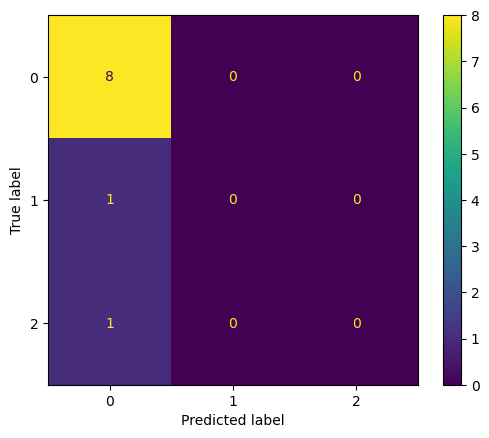

In [18]:
ytrain_ada=trained_model_ada.predict(x_test)
cf_ada=confusion_matrix(y_test,ytrain_ada)
ConfusionMatrixDisplay(confusion_matrix=cf_ada).plot()

display of feature importance of ada boost

In [19]:
fi_ada=trained_model_ada.feature_importances_
fi_ada

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.08, 0.04, 0.  ,
       0.  , 0.16, 0.1 , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.12, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.02, 0.08, 0.  , 0.  ,
       0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  ])

In [20]:
i=0
for elem in fi_ada: 
    if (elem >0):
        print(elem)
        print(x_train.columns[i])
    i=i+1

0.02
PD
0.08
Under_over budget
0.04
SP
0.16
TF
0.1
RI
0.02
SI_AVG
0.04
CRI-TAU_AVG
0.12
CRI-TAU_STD_DEV
0.12
CRI-RHO_STD_DEV.1
0.08
CPI_AVG
0.02
CPI_STD_DEV
0.08
CPI_FINAL
0.06
SPIT_AVG
0.06
Real_Duration


<BarContainer object of 64 artists>

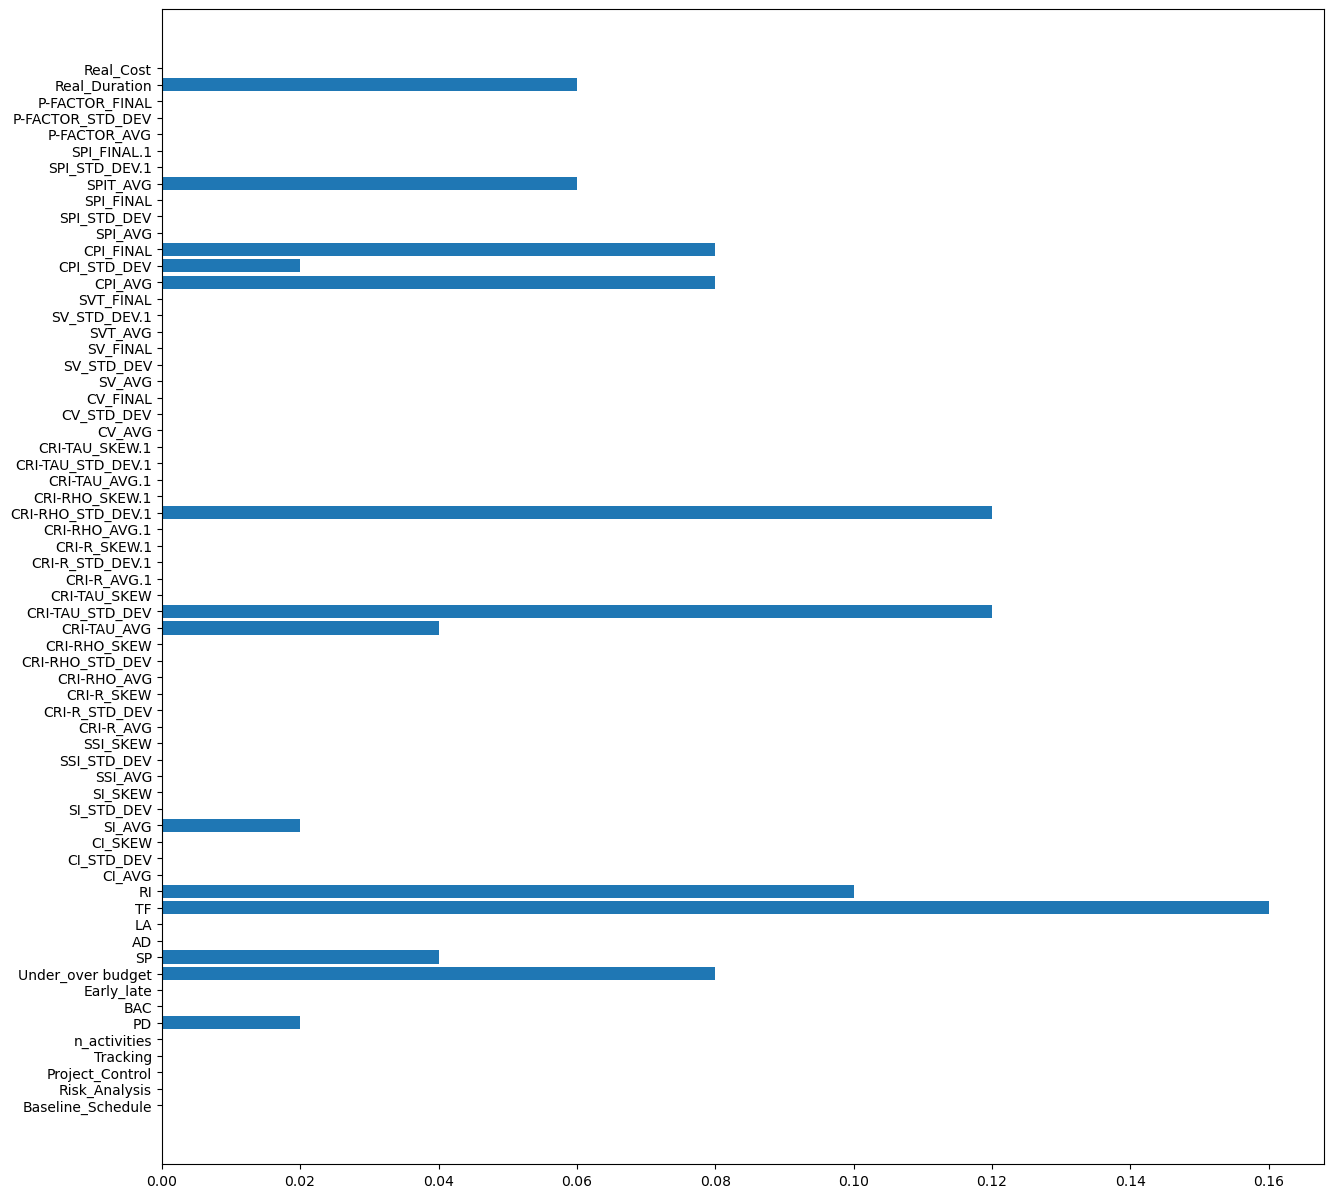

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(x_train.columns, fi_ada)

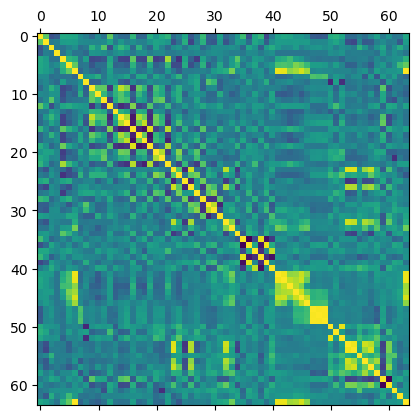

In [22]:
plt.matshow(x_train.corr())

import of libraries used for cross validation

In [23]:
from sklearn.model_selection import cross_val_score
from scipy import stats

cross validation of all 3 algorithms

In [24]:
k=2
scorecl1=cross_val_score(trained_model,x_train,y_train,cv=k)
scorecl2=cross_val_score(trained_model_rf,x_train,y_train,cv=k)
scorecl3=cross_val_score(trained_model_ada,x_train,y_train,cv=k)

c:\Users\ME\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\ME\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\ME\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


t test of all 3 algorithms 

In [25]:
_, p_value1_2=stats.ttest_rel(scorecl1,scorecl2)
_, p_value1_3=stats.ttest_rel(scorecl1,scorecl3)
_, p_value2_3=stats.ttest_rel(scorecl2,scorecl3)

compare the 3 classifiers based on cross validation test

In [26]:
print("Cross-validation scores:")
print("Classifier 1:", scorecl1.mean())
print("Classifier 2:", scorecl2.mean())
print("Classifier 3:", scorecl3.mean())
print("\nT-test p-values:")
print("Classifier 1 vs Classifier 2:", p_value1_2)
print("Classifier 1 vs Classifier 3:", p_value1_3)
print("Classifier 2 vs Classifier 3:", p_value2_3)

Cross-validation scores:
Classifier 1: 0.9
Classifier 2: 0.9666666666666667
Classifier 3: 0.8666666666666667

T-test p-values:
Classifier 1 vs Classifier 2: 0.49999999999999956
Classifier 1 vs Classifier 3: 0.49999999999999956
Classifier 2 vs Classifier 3: 0.49999999999999956


find the best one

In [27]:
best_classifier = None
if scorecl1.mean() >= scorecl2.mean() and scorecl1.mean() >= scorecl3.mean():
    best_classifier = trained_model
elif scorecl2.mean() >= scorecl1.mean() and scorecl2.mean() >= scorecl3.mean():
    best_classifier = trained_model_rf
else:
    best_classifier = trained_model_ada
print("\nBest classifier:", best_classifier)


Best classifier: RandomForestClassifier()


find the best one based on t test

In [28]:


# Determine the best classifier based on the p-values
best_classifier = None
if p_value1_2 < 0.05 and p_value1_3 < 0.05:
    best_classifier = "Classifier DT"
elif p_value2_3 < 0.05:
    best_classifier = "Classifier RF"
else:
    best_classifier = "Classifier AB"

print("\nBest classifier:", best_classifier)


Best classifier: Classifier AB


import and calculate f2 test precision and recall

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import  precision_score, recall_score, fbeta_score

y_pred = trained_model.predict(x_test)
y_predrf=trained_model_rf.predict(x_test)
y_predada=trained_model_ada.predict(x_test)
y_pred
precision = precision_score(y_test, y_pred,pos_label=2)
precisionrf = precision_score(y_test, y_pred,pos_label=2)
precisionada = precision_score(y_test, y_pred,pos_label=2)
recall = recall_score(y_test, y_pred,pos_label=2)
recallrf = recall_score(y_test, y_predrf,pos_label=2)
recallada = recall_score(y_test, y_predada,pos_label=2)
f2 = fbeta_score(y_test, y_pred,beta=2,pos_label=2)
f2rf = fbeta_score(y_test, y_predrf,beta=2,pos_label=2)
f2ada = fbeta_score(y_test, y_predada,beta=2,pos_label=2)

# Print the evaluation metrics
print("Decision tree")
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F2 Score: {:.2f}".format(f2))
print("Random Forest")
print("Precision: {:.2f}".format(precisionrf))
print("Recall: {:.2f}".format(recallrf))
print("F2 Score: {:.2f}".format(f2rf))
print("AdaBoost")
print("Precision: {:.2f}".format(precisionada))
print("Recall: {:.2f}".format(recallada))
print("F2 Score: {:.2f}".format(f2ada))





ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

find the best classifier based on precision and recall and f2 score

In [ ]:
if precision > precisionrf and precision > precisionada and recall > recallrf and recall > recallada and f2 > f2rf and f2 > f2ada:
    best_classifier = "Classifier Decision Tree"
elif precisionrf > precision and precisionrf > precisionada and recallrf > recall and recallrf > recallada and f2rf > f2 and f2rf > f2ada:
    best_classifier = "Classifier Random Forest"
elif precisionada > precision and precisionada > precisionrf and recallada > recall and recallada > recallrf and f2ada > f2 and f2ada > f2rf:
    best_classifier = "Classifier AdaBoost"
else:
    best_classifier = "No clear winner"  # If the scores are tied or not consistently better for one classifier

# Print the best classifier and its scores
print("Best Classifier: {}".format(best_classifier))
print("Classifier 1 - Precision: {:.2f}, Recall: {:.2f}, F2 Score: {:.2f}".format(precision, recall, f2))
print("Classifier 2 - Precision: {:.2f}, Recall: {:.2f}, F2 Score: {:.2f}".format(precisionrf, recallrf, f2rf))
print("Classifier 3 - Precision: {:.2f}, Recall: {:.2f}, F2 Score: {:.2f}".format(precisionada, recallada, f2ada))

Best Classifier: No clear winner
Classifier 1 - Precision: 0.50, Recall: 1.00, F2 Score: 0.83
Classifier 2 - Precision: 0.50, Recall: 0.00, F2 Score: 0.00
Classifier 3 - Precision: 0.50, Recall: 0.00, F2 Score: 0.00


valuation of classifiers based on index (AUC) by using ROC graph

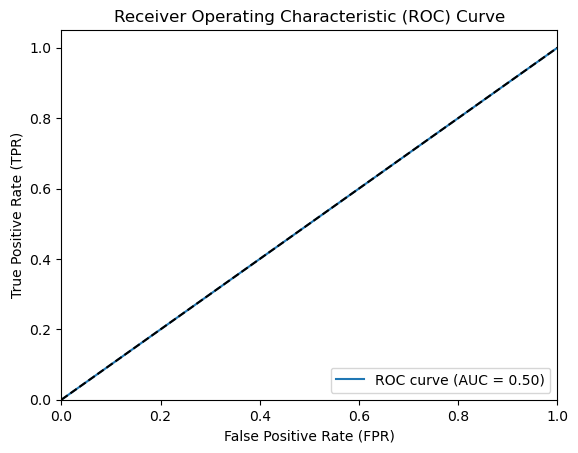

AUC: 0.50


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a trained classifier: clf
# Assuming you have testing data: X_test, y_test

# Make predictions using the trained classifier
y_scores = trained_model.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label=2)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the calculated AUC
print("AUC: {:.2f}".format(roc_auc))


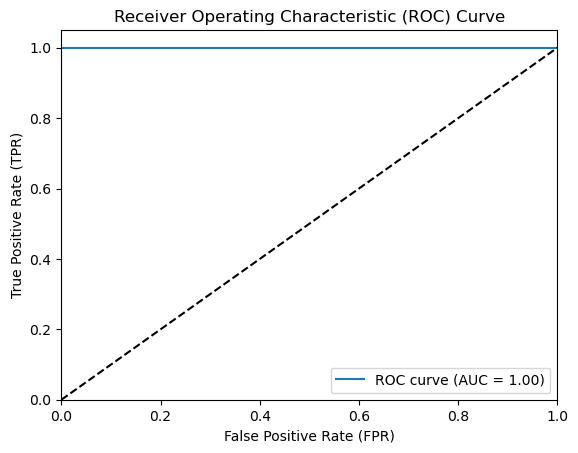

AUC: 1.00


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a trained classifier: clf
# Assuming you have testing data: X_test, y_test

# Make predictions using the trained classifier
y_scores = trained_model_rf.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label=2)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the calculated AUC
print("AUC: {:.2f}".format(roc_auc))


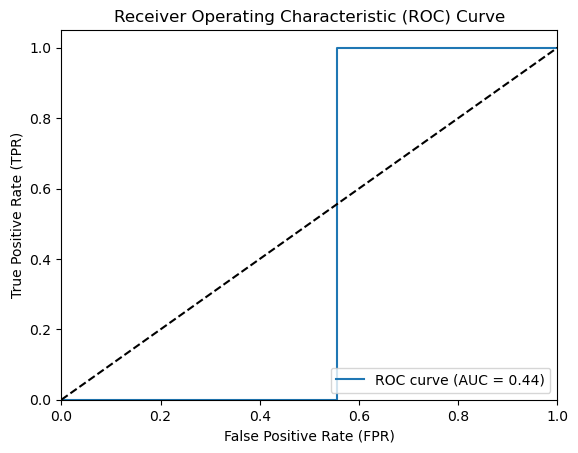

AUC: 0.44


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a trained classifier: clf
# Assuming you have testing data: X_test, y_test

# Make predictions using the trained classifier
y_scores = trained_model_ada.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label=2)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the calculated AUC
print("AUC: {:.2f}".format(roc_auc))
